## 4. <a name="4">Example - Binary Classification</a>
(<a href="#s1">Go to top</a>)

In this example, we will train a neural network on a dataset that we randomly generated. We will have two classes and train a neural network to classify them.

In [6]:
import torch
from torch import nn

In [2]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=750, shuffle=True, random_state=42, noise=0.05, factor=0.3)

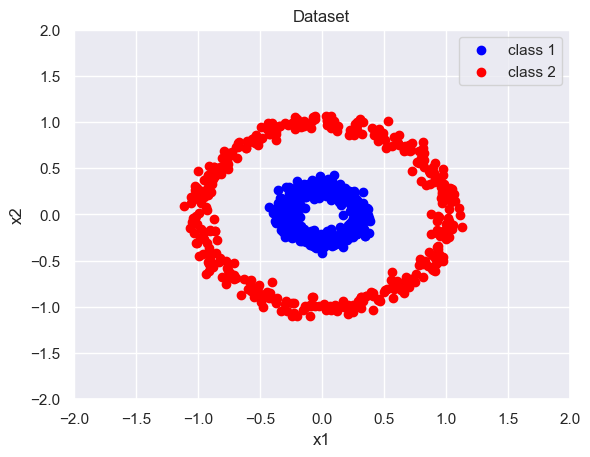

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

def plot_dataset(X, y, title):

    # Activate Seaborn visualization
    sns.set()

    # Plot both classes: Class1->Blue, Class2->Red
    plt.scatter(X[y==1, 0], X[y==1, 1], c='blue', label="class 1")
    plt.scatter(X[y==0, 0], X[y==0, 1], c='red', label="class 2")
    plt.legend(loc='upper right')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.xlim(-2, 2)
    plt.ylim(-2, 2)
    plt.title(title)
    plt.show()

plot_dataset(X, y, title="Dataset")

In [4]:
import time
from torch.nn import BCELoss

Then, we create the network as below. It will have two hidden layers. Since the data seems easily seperable, we can have a small network (2 hidden layers) with 10 units at each layer.

In [7]:
# Use GPU resource if available, otherwise wil use CPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

net = nn.Sequential(nn.Linear(in_features=2, out_features=10),
                    nn.ReLU(),
                    nn.Linear(10, 10),
                    nn.ReLU(),
                    nn.Linear(10, 1),  #binary分类的output只用1个label
                    nn.Sigmoid()).to(device)

Now let's prepare the training set and validation set, and load each of them to a `DataLoader`, respectively.

In [8]:
# Split the dataset into two parts: 80%-20% split
X_train, X_val = X[0:int(len(X)*0.8), :], X[int(len(X)*0.8):, :]
y_train, y_val = y[:int(len(X)*0.8)], y[int(len(X)*0.8):]

# Use PyTorch DataLoaders to load the data in batches
batch_size = 4           # How many samples to use for each weight update
train_dataset = torch.utils.data.TensorDataset(torch.tensor(X_train, dtype=torch.float32),
                                               torch.tensor(y_train, dtype=torch.float32))
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size)

# Move validation dataset on CPU/GPU device
X_val = torch.tensor(X_val, dtype=torch.float32).to(device)
y_val = torch.tensor(y_val, dtype=torch.float32).to(device)

In [9]:
epochs = 50   # Total number of iterations
lr = 0.01     # Learning rate

# Define the loss. As we used sigmoid in the last layer, we use `nn.BCELoss`.
# Otherwise we could have made use of `nn.BCEWithLogitsLoss`. sigmoid打包在nn.BCEWithLogitsLoss
loss = BCELoss(reduction='none') #返回向量

# Define the optimizer, SGD with learning rate
optimizer = torch.optim.SGD(net.parameters(), lr=lr)

In [10]:
train_losses = []
val_losses = []
for epoch in range(epochs):
    start = time.time()
    training_loss = 0
    # Build a training loop, to train the network
    for idx, (data, target) in enumerate(train_loader):
        # zero the parameter gradients
        optimizer.zero_grad()
        # Put data and label to the correct device
        data = data.to(device) #小量多次的移动数据比大量一次移动数据要慢吧？
        # view(-1, 1) reshapes (batch_size, ) to (batch_size, 1)
        target = target.to(device).view(-1, 1)
        # Make forward pass
        output = net(data)
        # Calculate loss
        L = loss(output, target).sum() #等价于上面直接定义loss = BCELoss(reduction='sum')
        training_loss += L.item() #用item()把tensor转成scalar，之后才可以画图
        # Make backwards pass (calculate gradients)
        L.backward()
        # Update weights
        optimizer.step()

    # Get validation predictions
    val_predictions = net(X_val)
    # Calculate the validation loss
    val_loss = torch.sum(loss(val_predictions, y_val.view(-1, 1))).item()

    # Take the average losses
    training_loss = training_loss / len(y_train)
    val_loss = val_loss / len(y_val)

    train_losses.append(training_loss)
    val_losses.append(val_loss)

    end = time.time()
    # Print the losses every 10 epochs
    if (epoch == 0) or ((epoch+1)%10 == 0):
        print("Epoch %s. Train_loss %f Validation_loss %f Seconds %f" % \
              (epoch, training_loss, val_loss, end-start))

Epoch 0. Train_loss 0.674382 Validation_loss 0.656528 Seconds 0.189521
Epoch 9. Train_loss 0.013165 Validation_loss 0.012338 Seconds 0.153142
Epoch 19. Train_loss 0.003040 Validation_loss 0.003167 Seconds 0.435577
Epoch 29. Train_loss 0.001580 Validation_loss 0.001708 Seconds 0.141616
Epoch 39. Train_loss 0.001037 Validation_loss 0.001148 Seconds 0.155667
Epoch 49. Train_loss 0.000760 Validation_loss 0.000858 Seconds 0.262042


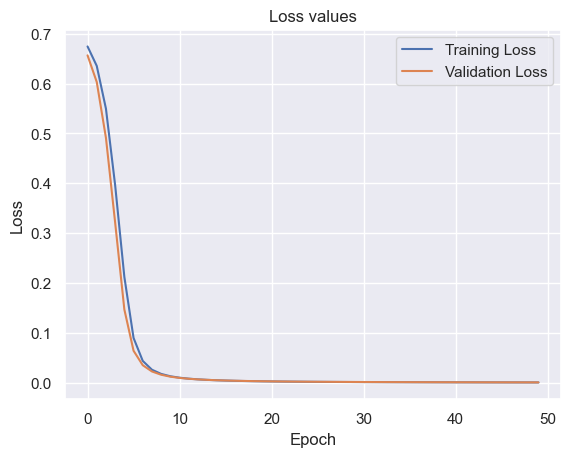

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.title("Loss values")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [1]:
# Import Required Libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create Neural Network with TensorFlow
Define a neural network model using TensorFlow's Keras API with two hidden layers.

In [3]:
# Create Neural Network with TensorFlow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the neural network model
model = Sequential([
    Dense(10, activation='relu', input_shape=(2,)),
    Dense(10, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

c:\Users\EFGUV\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 151 (604.00 B)

 Trainable params: 151 (604.00 B)

 Non-trainable params: 0 (0.00 B)

In [4]:
# Prepare Training and Validation Sets
from sklearn.model_selection import train_test_split

# Split the dataset into training and validation sets (80%-20% split)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert the datasets to TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(4)
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(4)

Epoch 1/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5377 - loss: 0.6854 - val_accuracy: 0.5667 - val_loss: 0.6542
Epoch 2/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6346 - loss: 0.6559 - val_accuracy: 0.7667 - val_loss: 0.6233
Epoch 3/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8472 - loss: 0.6267 - val_accuracy: 0.8867 - val_loss: 0.5911
Epoch 4/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9552 - loss: 0.5932 - val_accuracy: 0.9667 - val_loss: 0.5561
Epoch 5/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9878 - loss: 0.5580 - val_accuracy: 0.9933 - val_loss: 0.5172
Epoch 6/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9992 - loss: 0.5190 - val_accuracy: 0.9933 - val_loss: 0.4741
Epoch 7/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 0.4716 - val_accuracy: 1.0000 - val_loss: 0.4271
Epoch 8/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.4224 - val_accuracy: 1.

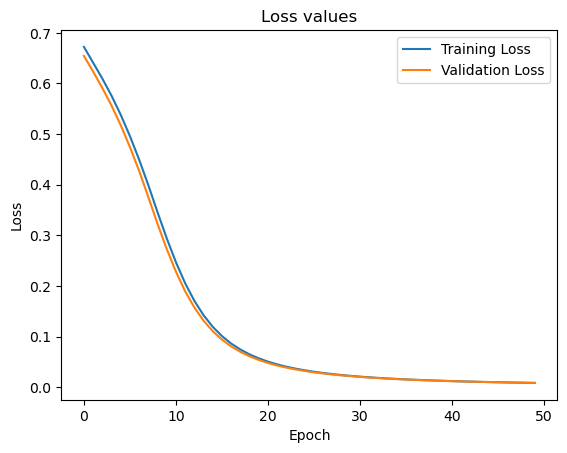

In [5]:
# Train the Model
history = model.fit(train_dataset, epochs=50, validation_data=val_dataset)

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss values')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

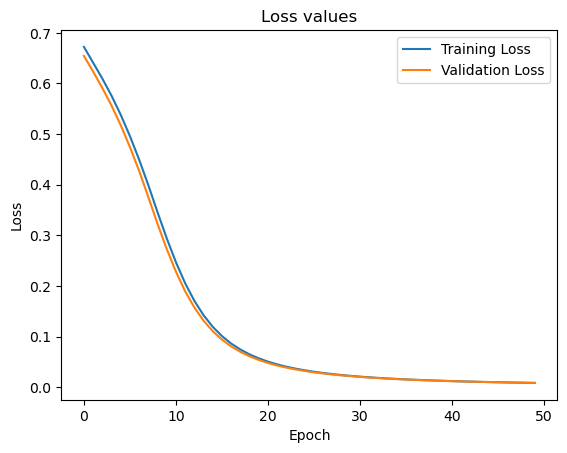

In [6]:
# Plot Training and Validation Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss values')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()